In [45]:

import pandas as pd
import numpy as np
import os
from os.path import join


### Load in all files and display them

In [59]:
data_dir = "..\\data\\raw\\mimic-iv-2.2\\mimic-iv-2.2\\hosp"
files = []
for file in os.listdir(data_dir):
    files.append(join(data_dir, file))
files.sort()

### Inspect Admissions

In [47]:
admissions = pd.read_csv(files[0])
admissions.head()
print("There are admissions for ",admissions.subject_id.nunique(), "patients.")

There are admissions for  180733 patients.


### Select those present in patients

In [48]:
## How many patients are in the MIMIC-IV database?
patients = pd.read_csv(files[-9])
print(f"Number of patients in MIMIC-IV: {len(patients.subject_id.unique())}")

Number of patients in MIMIC-IV: 299712


In [54]:
admissions = admissions[admissions.subject_id.isin(patients.subject_id.unique())]

In [50]:
admissions = admissions.sort_values(['subject_id', 'admittime'])
admissions.admittime = pd.to_datetime(admissions.admittime)
admissions.dischtime = pd.to_datetime(admissions.dischtime)
# compute time between discharge of the last admission and admittime of the next admission
admissions['next_admittime'] = admissions.groupby('subject_id')['admittime'].shift(-1)
admissions['time_between'] = admissions['next_admittime'] - admissions['dischtime']
# remove the temporary 'next_admittime' column
admissions = admissions.drop(columns='next_admittime')
admissions.time_between = admissions.time_between.dt.total_seconds() / 60 / 60 / 24
admissions.time_between.describe()

count    250498.000000
mean        319.445096
std         553.851010
min         -29.731250
25%          15.806944
50%          76.376736
75%         357.265451
max        4329.223611
Name: time_between, dtype: float64

<AxesSubplot:>

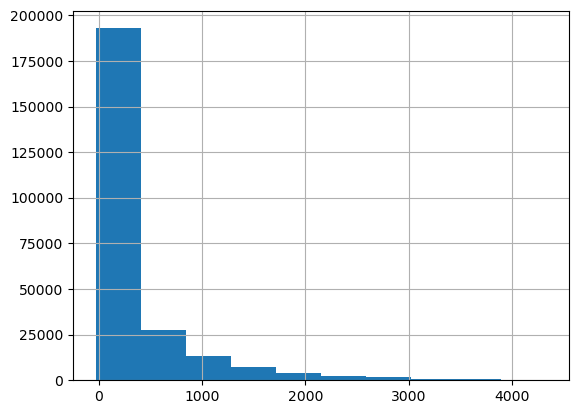

In [51]:
admissions.time_between.hist()

In [53]:
admissions.subject_id.nunique()

180733

In [52]:
np.unique(admissions.groupby('subject_id').hadm_id.count().values, return_counts=True)

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         67,  68,  69,  70,  71,  72,  75,  76,  77,  78,  79,  80,  82,
         84,  85,  86,  88,  89,  92,  93,  94,  95,  97,  98, 129, 130,
        142, 163, 185, 238], dtype=int64),
 array([101198,  35712,  15923,   8738,   5205,   3383,   2287,   1681,
          1299,    939,    748,    593,    474,    395,    312,    236,
           183,    174,    141,    138,     97,    106,     67,     70,
            52,     49,     56,     37,     31,     37,     30,     26,
            29,     20,     26,     18,     17,     11,     11,     13,
            12,      9,      5,     14,      6,      6,      8,      7,
            11

In [63]:
diagnoses = pd.read_csv(files[5])
diagnoses.subject_id.nunique()

180640

180640